In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from lifetimes import GammaGammaFitter

In [2]:
df = pd.read_csv('/Users/divyeshpatil/Desktop/Github/CLV/clv_analysis.csv')

In [3]:
df


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
# Display the first few rows of the dataset
print(df.head())

  Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1

In [5]:
# Get basic statistics of numerical columns
print(df.describe())

       Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000              

In [6]:
# Check for missing values
print(df.isnull().sum())

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64


In [7]:
# Check data types of columns
print(df.dtypes)

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object


In [34]:
# Create a GammaGammaFitter object
ggf = GammaGammaFitter(penalizer_coef=0.05)

# Fit the Gamma-Gamma model
ggf.fit(df['Number of Policies'], df['Total Claim Amount'])


<lifetimes.GammaGammaFitter: fitted with 9134 subjects, p: 1.48, q: 0.20, v: 1.37>

In [35]:
# Calculate the expected average transaction value
expected_average_transaction_value = ggf.conditional_expected_average_profit(df['Number of Policies'], df['Total Claim Amount'])

# Calculate CLV
df['CLV'] = expected_average_transaction_value * df['Number of Policies']


In [36]:
print(df['CLV'])

0        835.333175
1       9705.405562
2       1551.402816
3       4019.271553
4        301.745399
           ...     
9129     544.123222
9130     823.195846
9131    2164.989568
9132    2528.079450
9133     802.430332
Name: CLV, Length: 9134, dtype: float64


In [37]:
# Calculate and print the average CLV value
average_clv = df['CLV'].mean()
print(f"Average CLV: {average_clv:.2f}")


Average CLV: 1653.37


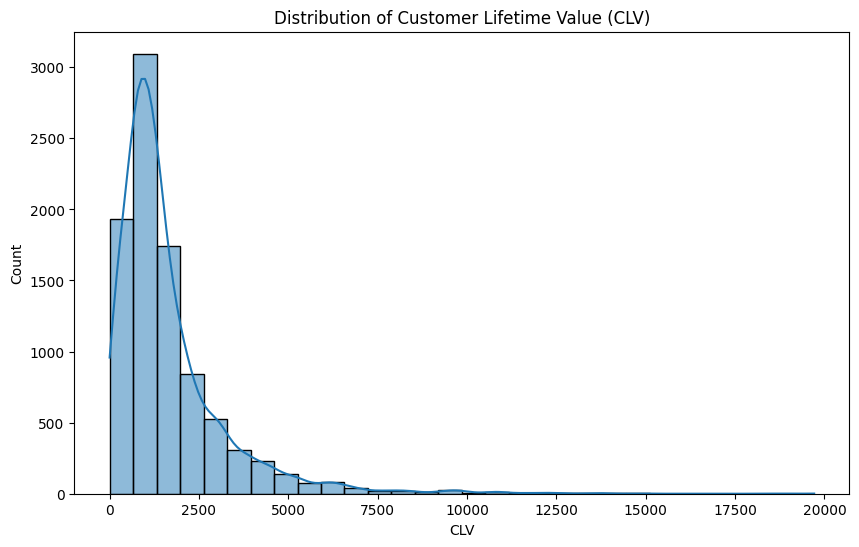

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='CLV', bins=30, kde=True)
plt.title('Distribution of Customer Lifetime Value (CLV)')
plt.xlabel('CLV')
plt.ylabel('Count')
plt.show()


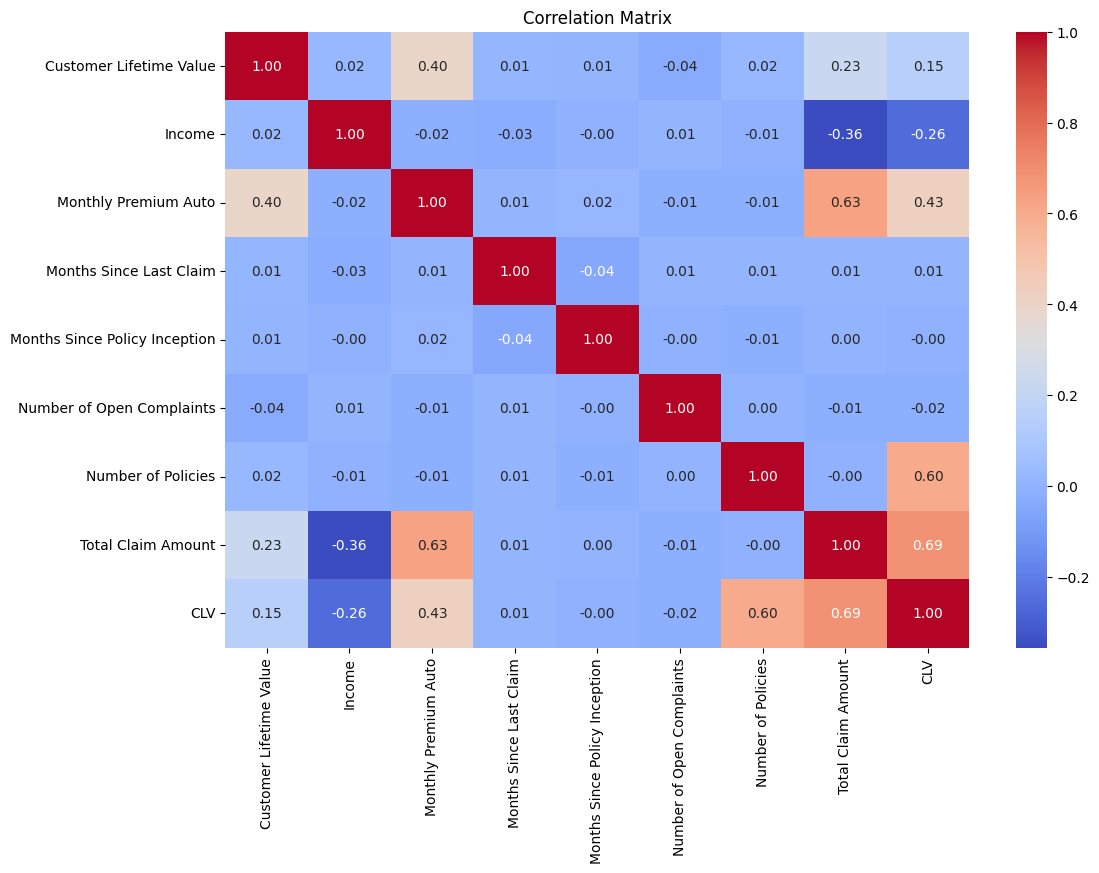

In [39]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

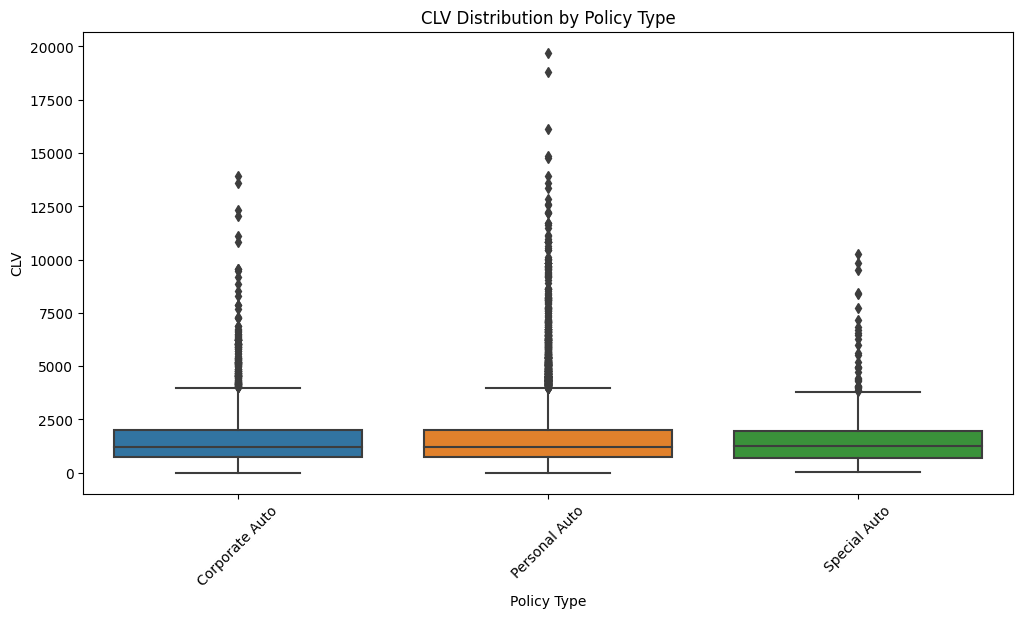

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Policy Type', y='CLV')
plt.title('CLV Distribution by Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('CLV')
plt.xticks(rotation=45)
plt.show()

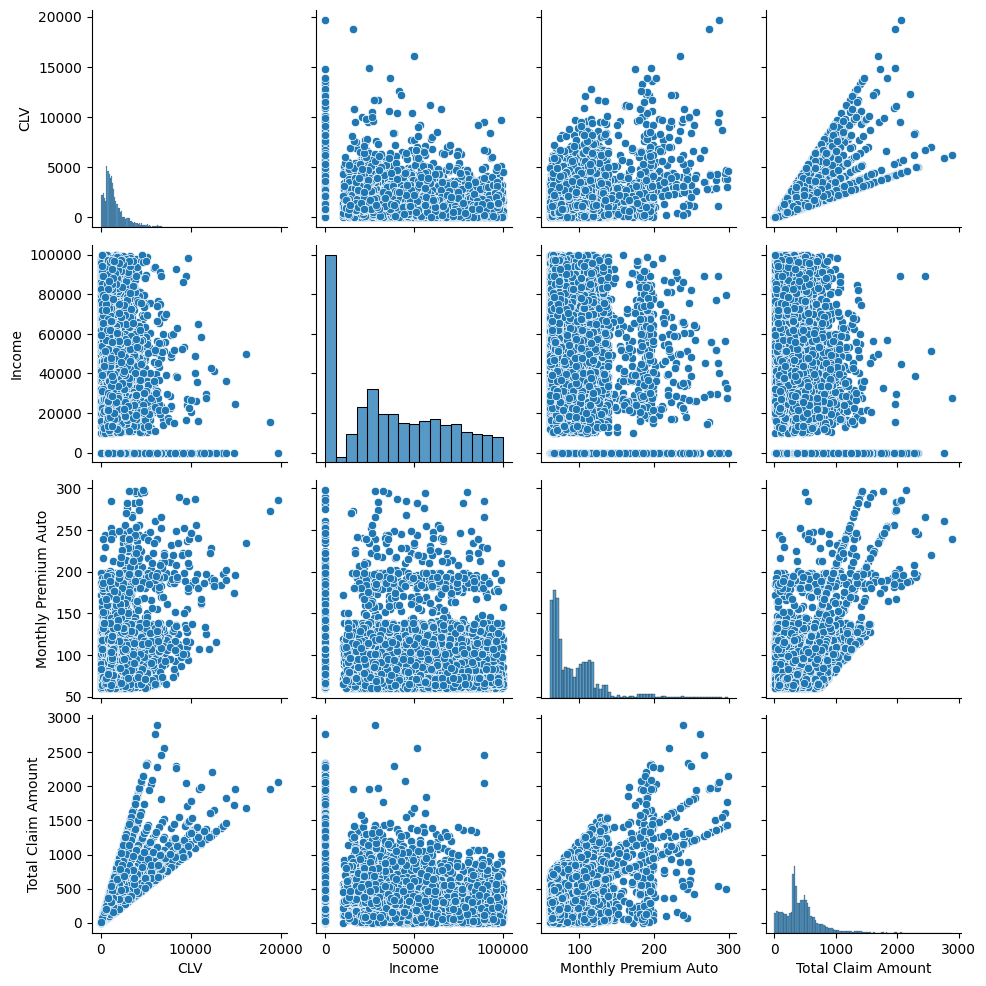

In [41]:
sns.pairplot(df[['CLV', 'Income', 'Monthly Premium Auto', 'Total Claim Amount']])
plt.show()

In [ ]:
#Building Machine Learning Model to predict Churn customers

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [48]:
X = df[['Monthly Premium Auto', 'Total Claim Amount', 'Number of Policies', 'Income']]
y = df['Response'] 

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [54]:
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.99
              precision    recall  f1-score   support

          No       1.00      0.99      0.99      1561
         Yes       0.94      0.98      0.96       266

    accuracy                           0.99      1827
   macro avg       0.97      0.99      0.98      1827
weighted avg       0.99      0.99      0.99      1827



In [55]:
# Example: Make predictions on new data
new_data = pd.DataFrame({'Monthly Premium Auto': [100], 'Total Claim Amount': [500], 'Number of Policies': [2], 'Income': [60000]})
prediction = clf.predict(new_data)
print(f'Churn Prediction: {prediction[0]}')

Churn Prediction: No


In [ ]:
#Identifying High value customer 

In [62]:
# Define a threshold for high-value customers
high_value_threshold = 5000

# Identify high-value customers
high_value_customers = df[df['CLV'] > high_value_threshold]
high_value_customers_percentage = (len(high_value_customers) / len(df)) * 100
print(f"Percentage of High-Value Customers: {high_value_customers_percentage:.2f}%")

# Calculate total revenue from high-value customers
total_revenue_from_high_value = high_value_customers['Total Claim Amount'].sum()
total_revenue_percentage = (total_revenue_from_high_value / df['Total Claim Amount'].sum()) * 100
print(f"Percentage of Total Revenue from High-Value Customers: {total_revenue_percentage:.2f}%")

Percentage of High-Value Customers: 4.20%
Percentage of Total Revenue from High-Value Customers: 9.46%


In [ ]:
#Customer Segmentation

In [56]:
from sklearn.cluster import KMeans

In [57]:
X = df[['Monthly Premium Auto', 'Total Claim Amount']]

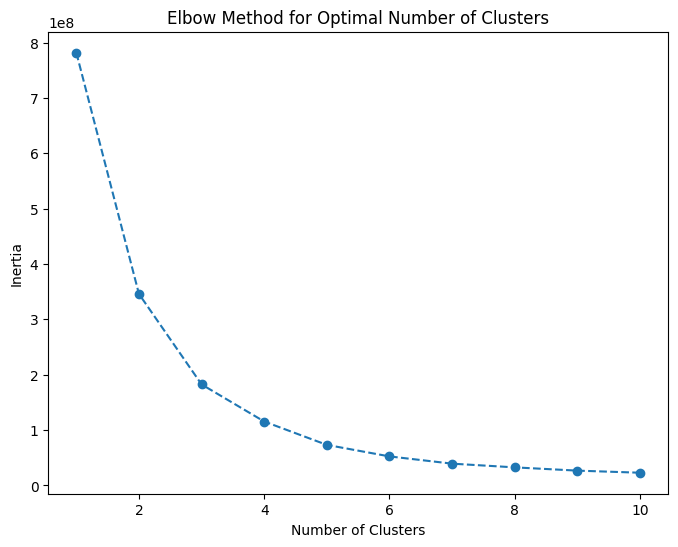

In [58]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [59]:
# Example: Fit the K-Means model with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(X)

In [60]:
# Example: Analyze segments
segment_means = df.groupby('Segment')[['Monthly Premium Auto', 'Total Claim Amount']].mean()
print(segment_means)

         Monthly Premium Auto  Total Claim Amount
Segment                                          
0                   99.041023          557.515041
1                  165.705521         1166.840921
2                   78.600888          235.041308
